# EAS-510 (Fundamental of Artificial Intelligence): Project-1

### Analyzing WDBC dataset using classification and regression models

Submitted by:<br><br>

Name - Shivansh Gupta <br>
UBIT Name - sgupta67 <br>
UB Person Number - 50604127 <br>
UB Email ID - sgupta67@buffalo.edu <br>

### Part I: Data Analysis – `Wisconsin Diagnostic Breast Cancer (WDBC)`

#### 1) Importing Libraries

Importing Basic Python Libraries

In [480]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px
%matplotlib inline

Importing Machine Learning Libraries

In [481]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor

#### 2) Uploding and understanding the structure of the data

Importing the dataset

In [482]:
cancer_data_df = pd.read_csv('Dataset/cancer_data.csv')

cancer_data_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [483]:
cancer_data_df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


Understanding the metadata of the dataset

In [484]:
cancer_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           567 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          568 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            568 non-null    float64
 11  fractal_dimension_mean   568 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               568 non-null    float64
 14  perimeter_se             5

In [485]:
cancer_data_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,567.000000,569.000000,568.000000,569.000000,569.000000,569.000000,568.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.877831,654.889104,0.096397,0.104341,0.088799,0.048919,0.181168,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.127261,351.914129,0.014049,0.052813,0.079720,0.038803,0.027438,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.190000,420.300000,0.086400,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095895,0.092630,0.061540,0.033500,0.179250,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,103.950000,782.700000,0.105325,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [486]:
cancer_data_transposed = cancer_data_df.describe().T
cancer_data_transposed

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,567.0,9.187783e+01,2.412726e+01,43.790000,75.190000,86.240000,1.039500e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,568.0,9.639688e-02,1.404937e-02,0.052630,0.086400,0.095895,1.053250e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,568.0,1.811676e-01,2.743810e-02,0.106000,0.161900,0.179250,1.957000e-01,3.040000e-01


In [487]:
cancer_data_df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             520
area_mean                  539
smoothness_mean            473
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 518
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             540
concavity_se               531
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

In [488]:
print('The number of observations in the whole dataset: ', cancer_data_df.shape)


The number of observations in the whole dataset:  (569, 32)


#### 3) Data Preprocessing

Missing values in the Dataset

In [489]:
cancer_data_df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             2
area_mean                  0
smoothness_mean            1
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              1
fractal_dimension_mean     1
radius_se                  0
texture_se                 1
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             1
concavity_se               2
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

As per the above table, columns: `perimeter_mean`, `smoothness_mean`, `symmetry_mean`, `fractal_dimension_mean`, `texture_se`, `compactness_se`, `concavity_se`, have missing values, So in order to handle that I will be using the <b>`mean method`<b>

Handling the missing values using Mode Method

In [490]:
mode_fill_columns = ['perimeter_mean', 'smoothness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'compactness_se', 'concavity_se']

for columns in mode_fill_columns:
    cancer_data_df[columns] = cancer_data_df[columns].fillna(cancer_data_df[columns].mode()[0])

In [491]:
cancer_data_df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

As per the above table there are no missing values left in the dataset

Dropping unnecessary column: <b>`id`</b> as it has less impact on the results

In [492]:
cancer_data_df = cancer_data_df.drop('id', axis=1)
cancer_data_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### 4) Label encoding the target column: <b>`diagnosis`</b>

In [493]:
unique_diagonis = cancer_data_df['diagnosis'].unique()
diagnosis_df = cancer_data_df[cancer_data_df['diagnosis'].isin(unique_diagonis)]
diagnosis_count_series = diagnosis_df['diagnosis'].value_counts()

print(diagnosis_count_series)

diagnosis
B    357
M    212
Name: count, dtype: int64


Modifying target column income with 0/1 values for `modeling`

`0` when `diagnosis = B` and `1` when `diagnosis = M`

In [494]:
cancer_data_df.loc[cancer_data_df['diagnosis'] == 'B', 'diagnosis'] = 0
cancer_data_df.loc[cancer_data_df['diagnosis'] == 'M', 'diagnosis'] = 1

cancer_data_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


#### 5) Correlation Matrix for the Dataset

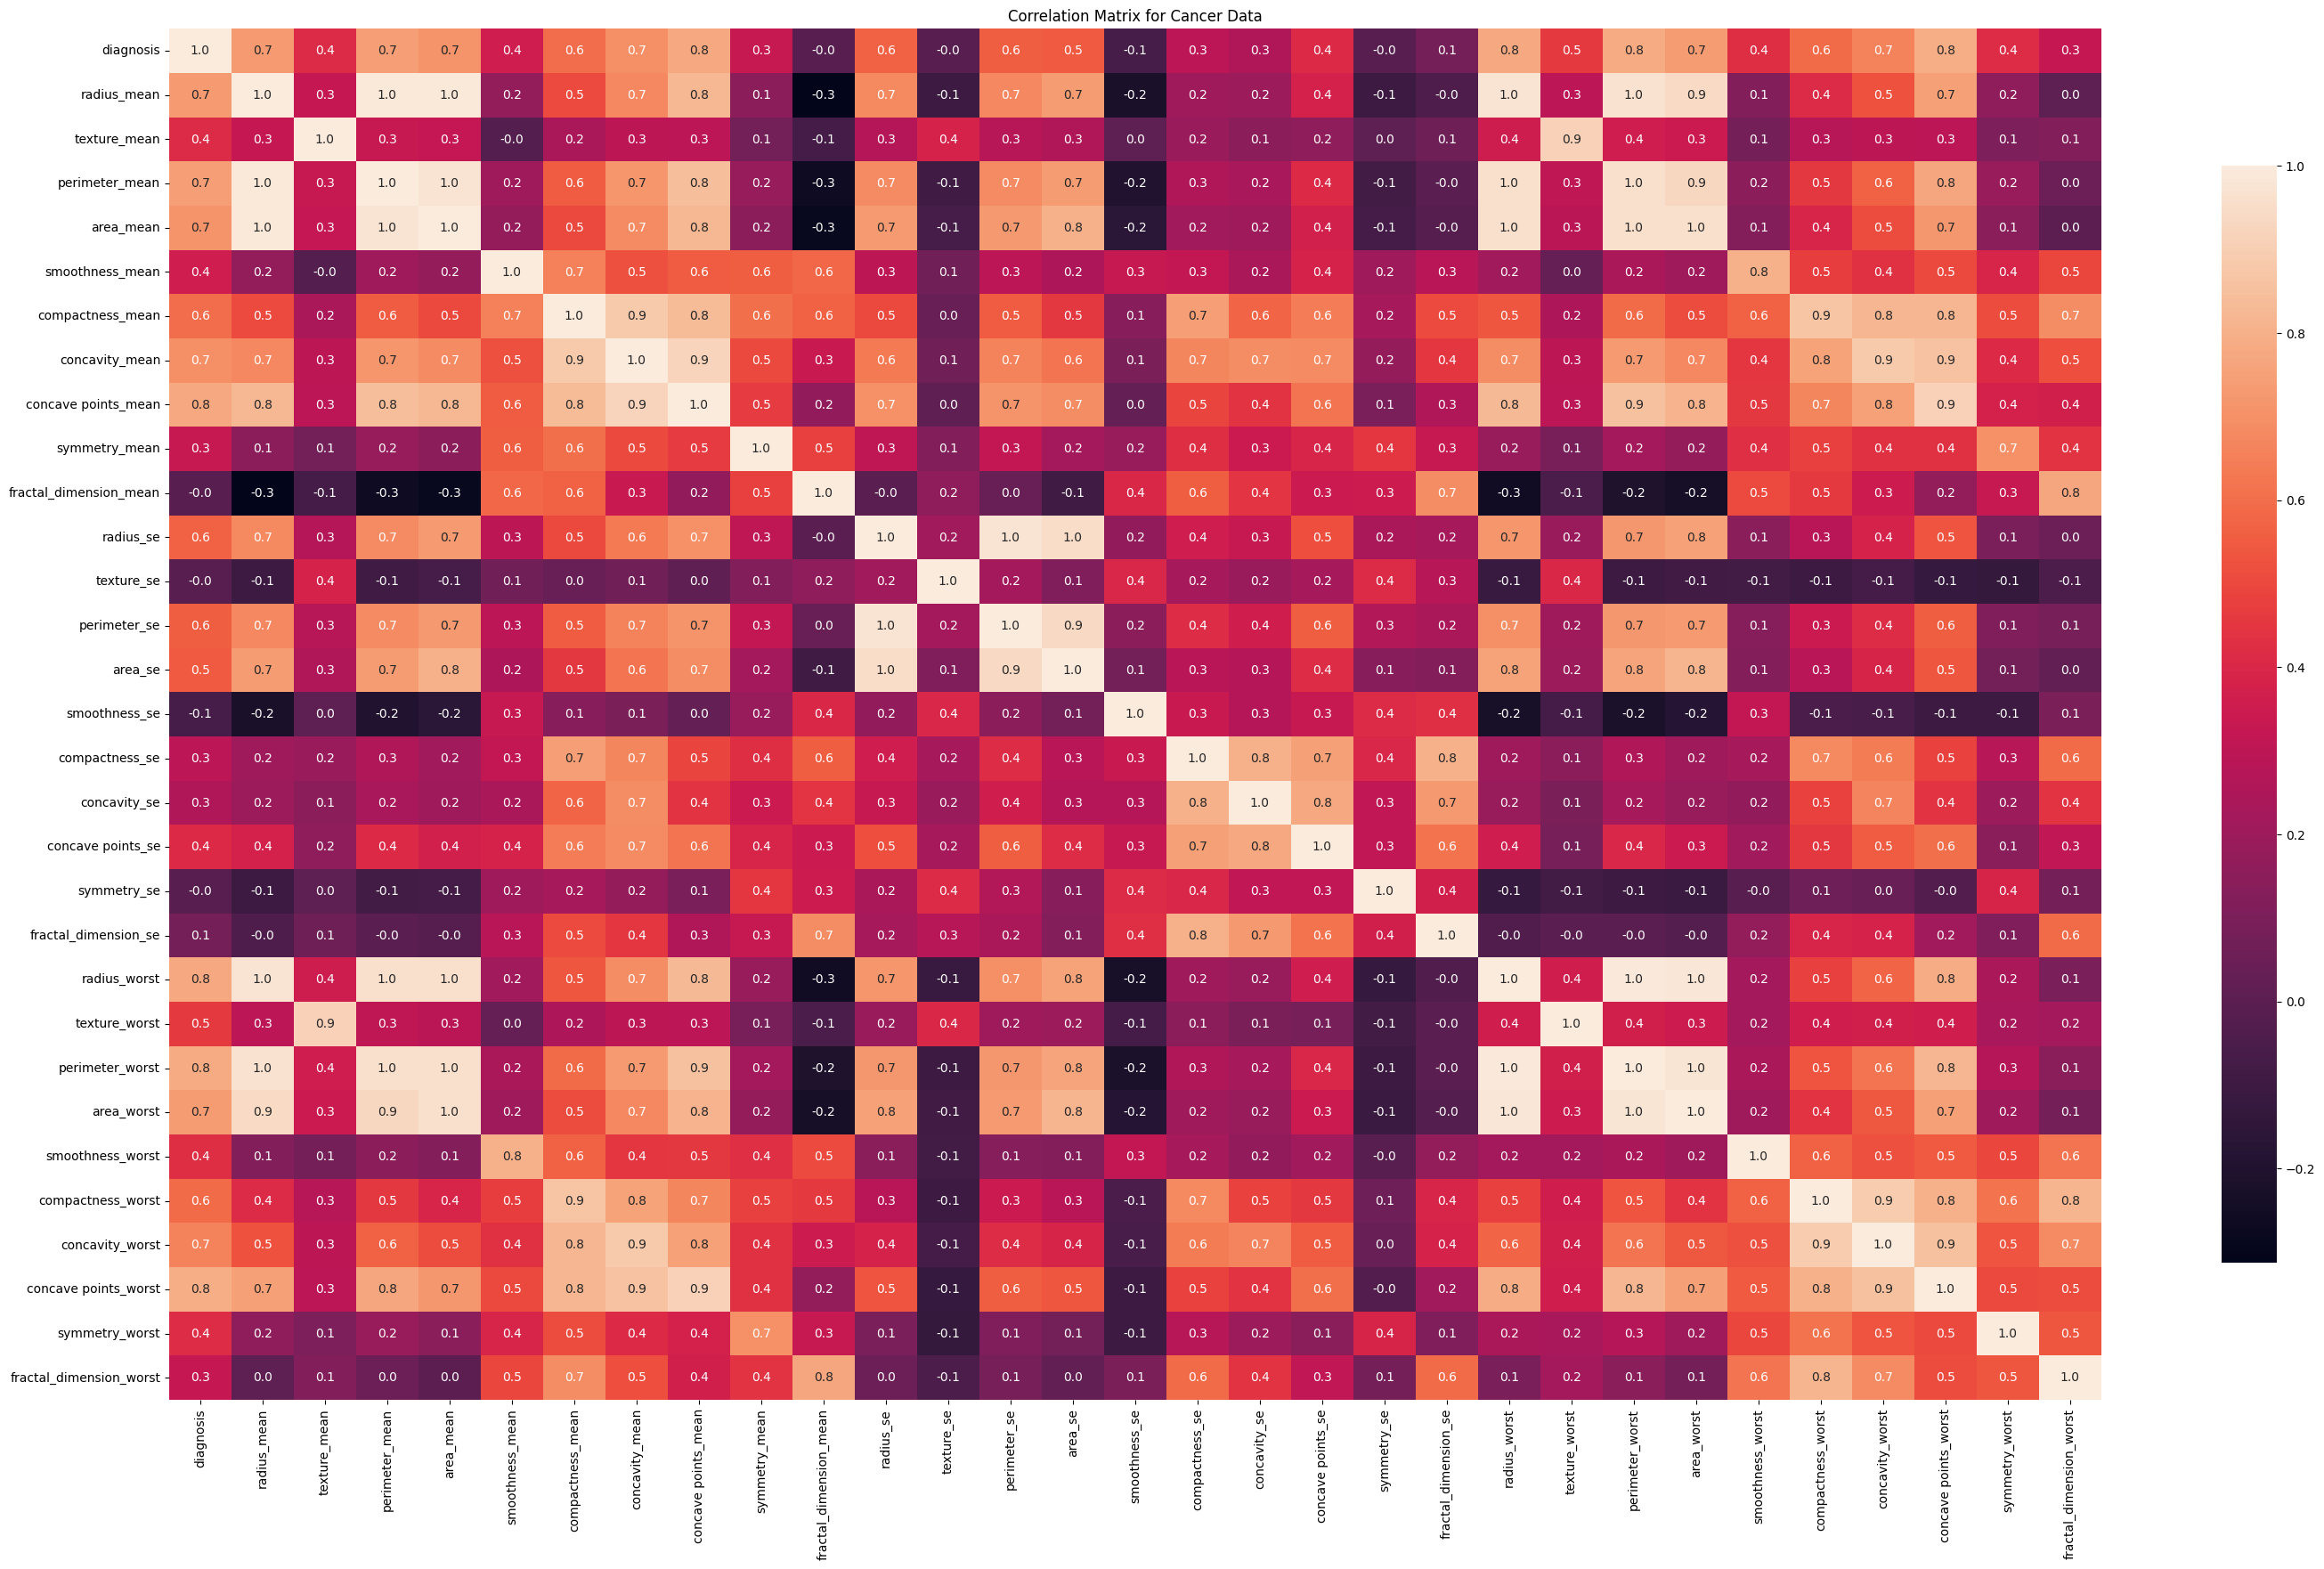

In [495]:
corr = cancer_data_df.corr()

plt.figure(figsize=(35, 20))

sns.heatmap(corr, 
            annot=True,  # Annotate cells with correlation values
            fmt=".1f",   # Format for correlation values
            cbar_kws={"shrink": .8})  # Shrink color bar

# Set the title
plt.title('Correlation Matrix for Cancer Data')

# Show the plot
plt.show()

### Part II: (Classification)

#### 1) Data Scalling and splitting the dataset for Modeling

Scaling the dataset using the MinMaxScaler

In [496]:
scaler = MinMaxScaler()
cancer_scaled = scaler.fit_transform(cancer_data_df)

cancer_data_scaled = pd.DataFrame(cancer_scaled, columns=cancer_data_df.columns)

cancer_data_scaled

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.0,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,1.0,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,1.0,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,1.0,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


Separating the features and label

In [497]:
X = cancer_data_scaled.drop(columns=['diagnosis'])
y = cancer_data_scaled['diagnosis']

Split the data into training and testing sets

In [498]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9, stratify=y)

print(f"Training set shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, Testing labels shape: {y_test.shape}")

Training set shape: (398, 30), Training labels shape: (398,)
Testing set shape: (171, 30), Testing labels shape: (171,)


#### 2) Applying K-Means Algorithm

In [499]:
kmeans = KMeans(n_clusters=2, random_state=42)  # Adjust n_clusters as needed
kmeans.fit(X)

cancer_data_df['Cluster'] = kmeans.labels_

K-means plot between `texture_mean` and `perimeter_mean`

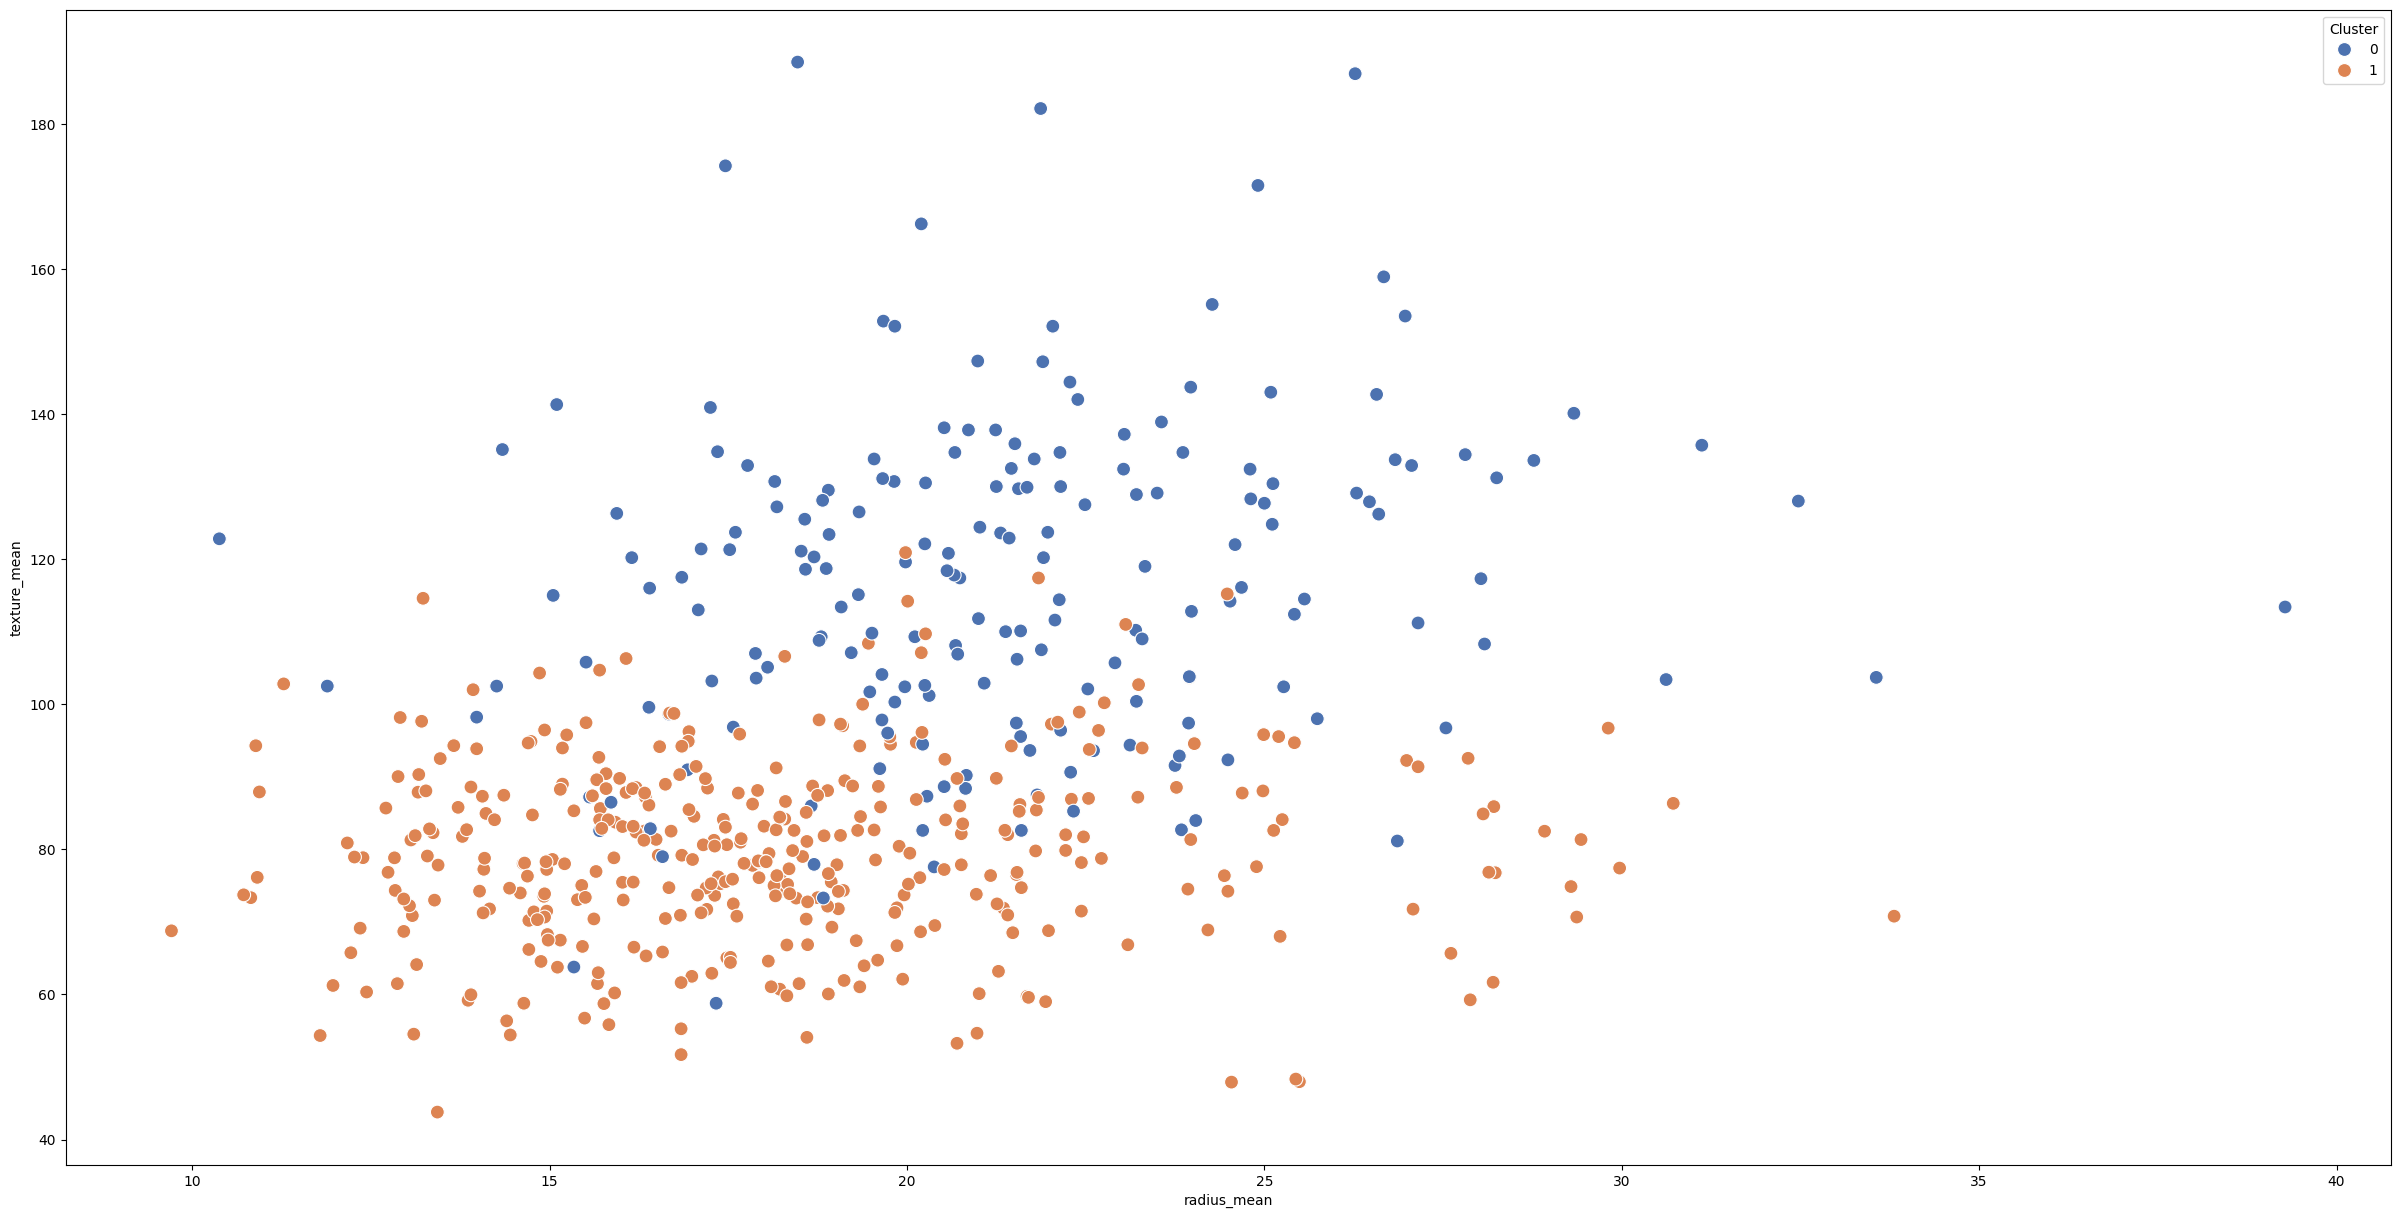

In [500]:
plt.figure(figsize=(30, 15))
sns.scatterplot(data=cancer_data_df, x=X.columns[1], y=X.columns[2], hue=cancer_data_df['Cluster'], palette='deep', s=100)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.show()

K-means plot between `radius_mean` and `area_mean`

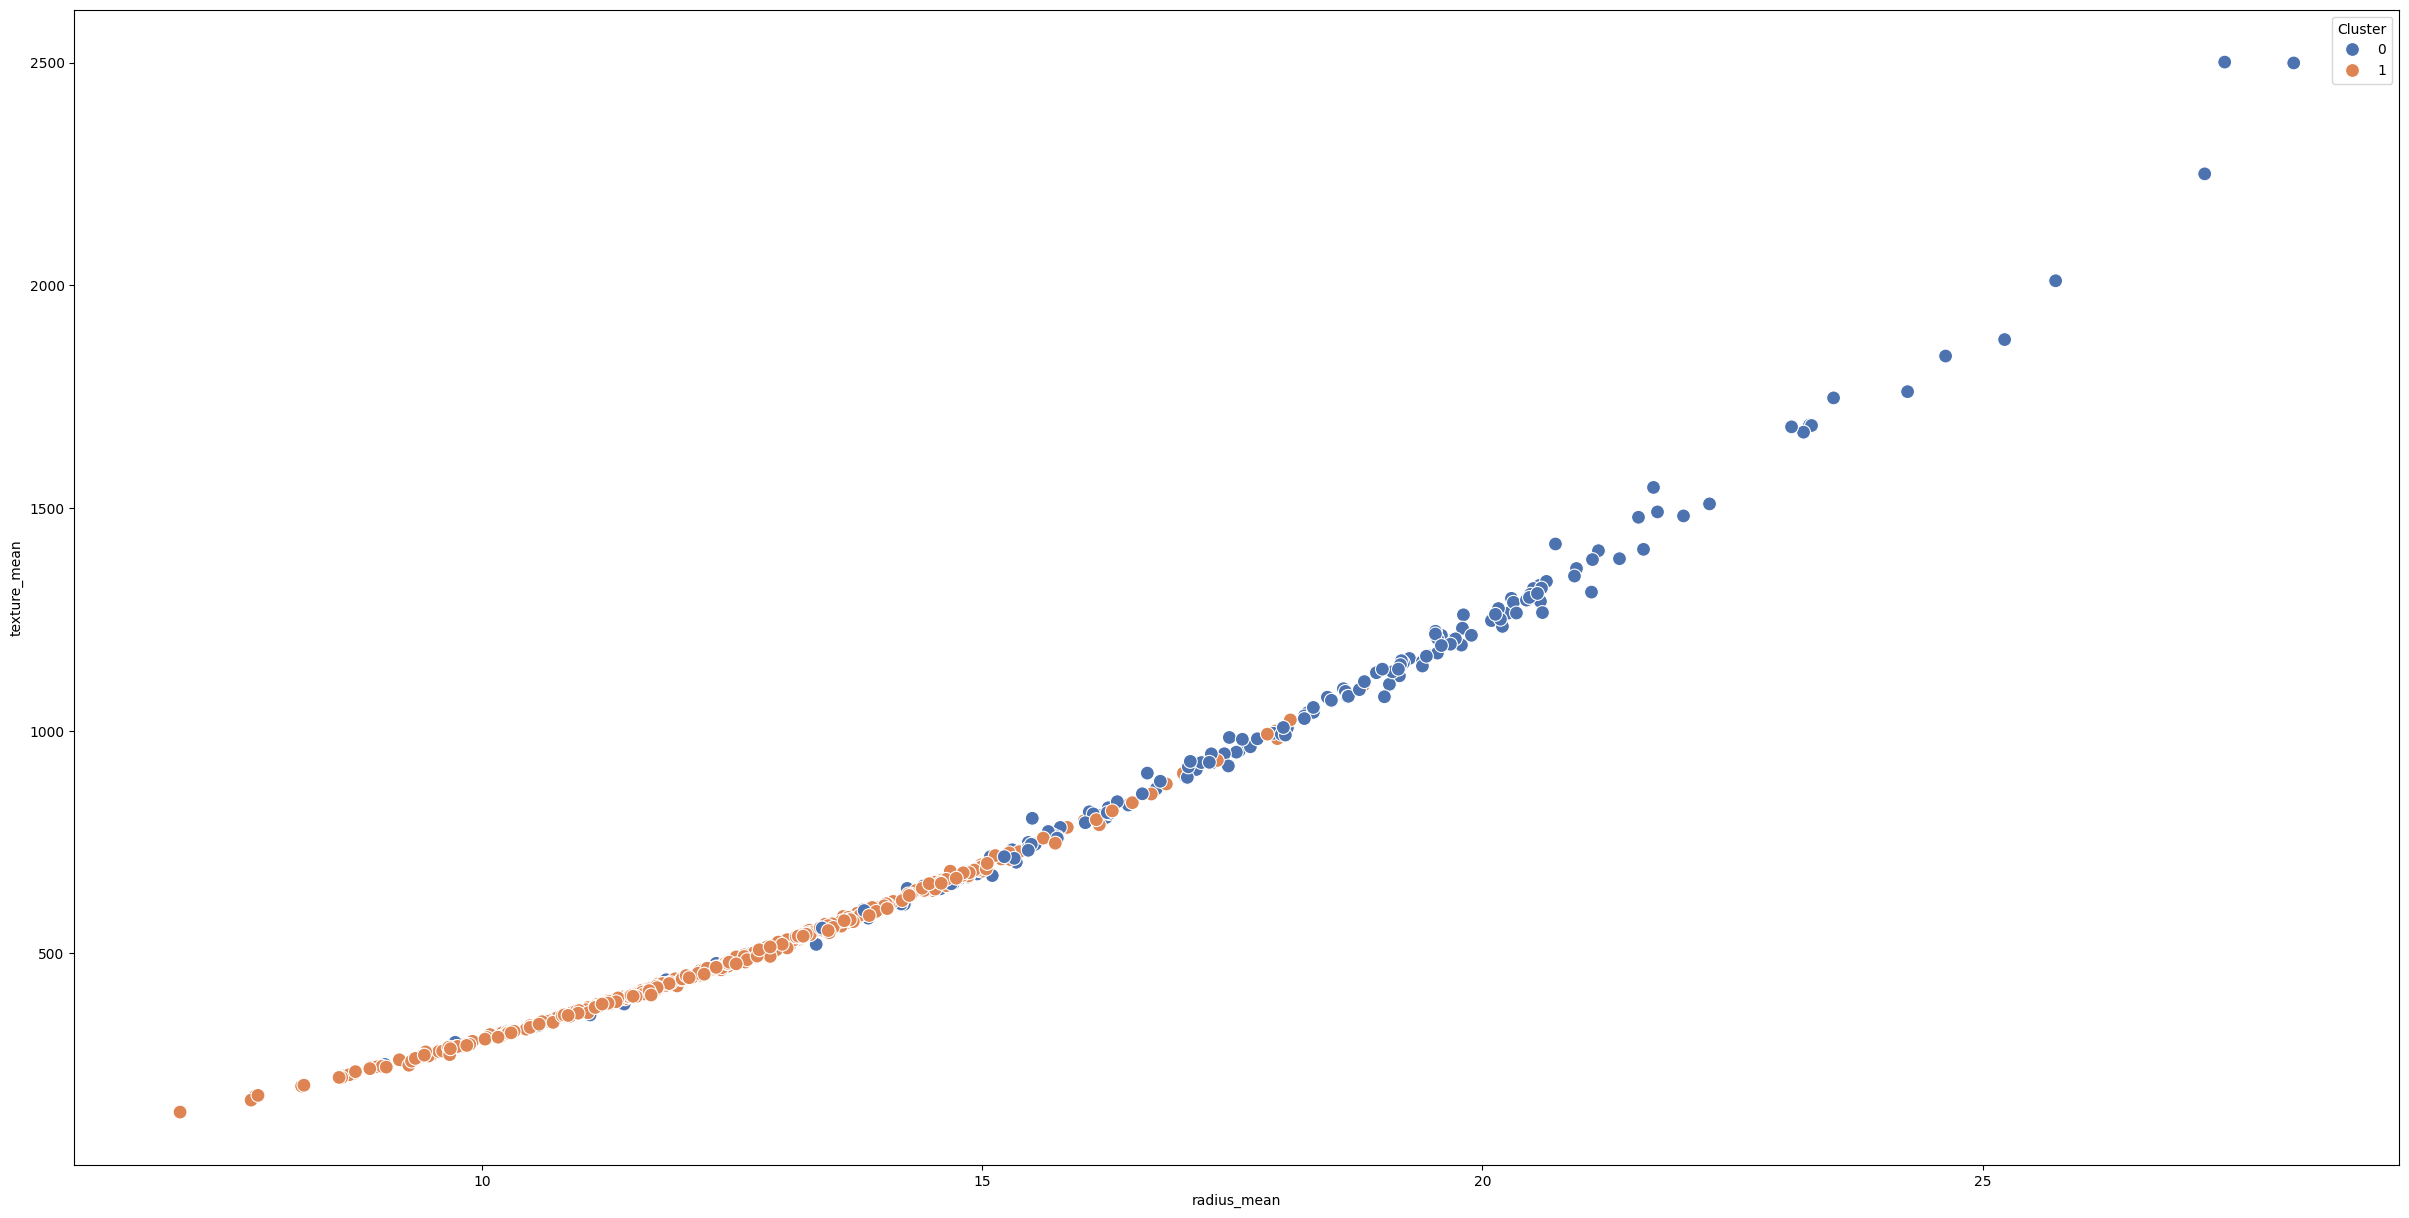

In [501]:
plt.figure(figsize=(30, 15))
sns.scatterplot(data=cancer_data_df, x=X.columns[0], y=X.columns[3], hue=cancer_data_df['Cluster'], palette='deep', s=100)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.show()

K-means plot between `perimeter_mean` and `concave points_mean`

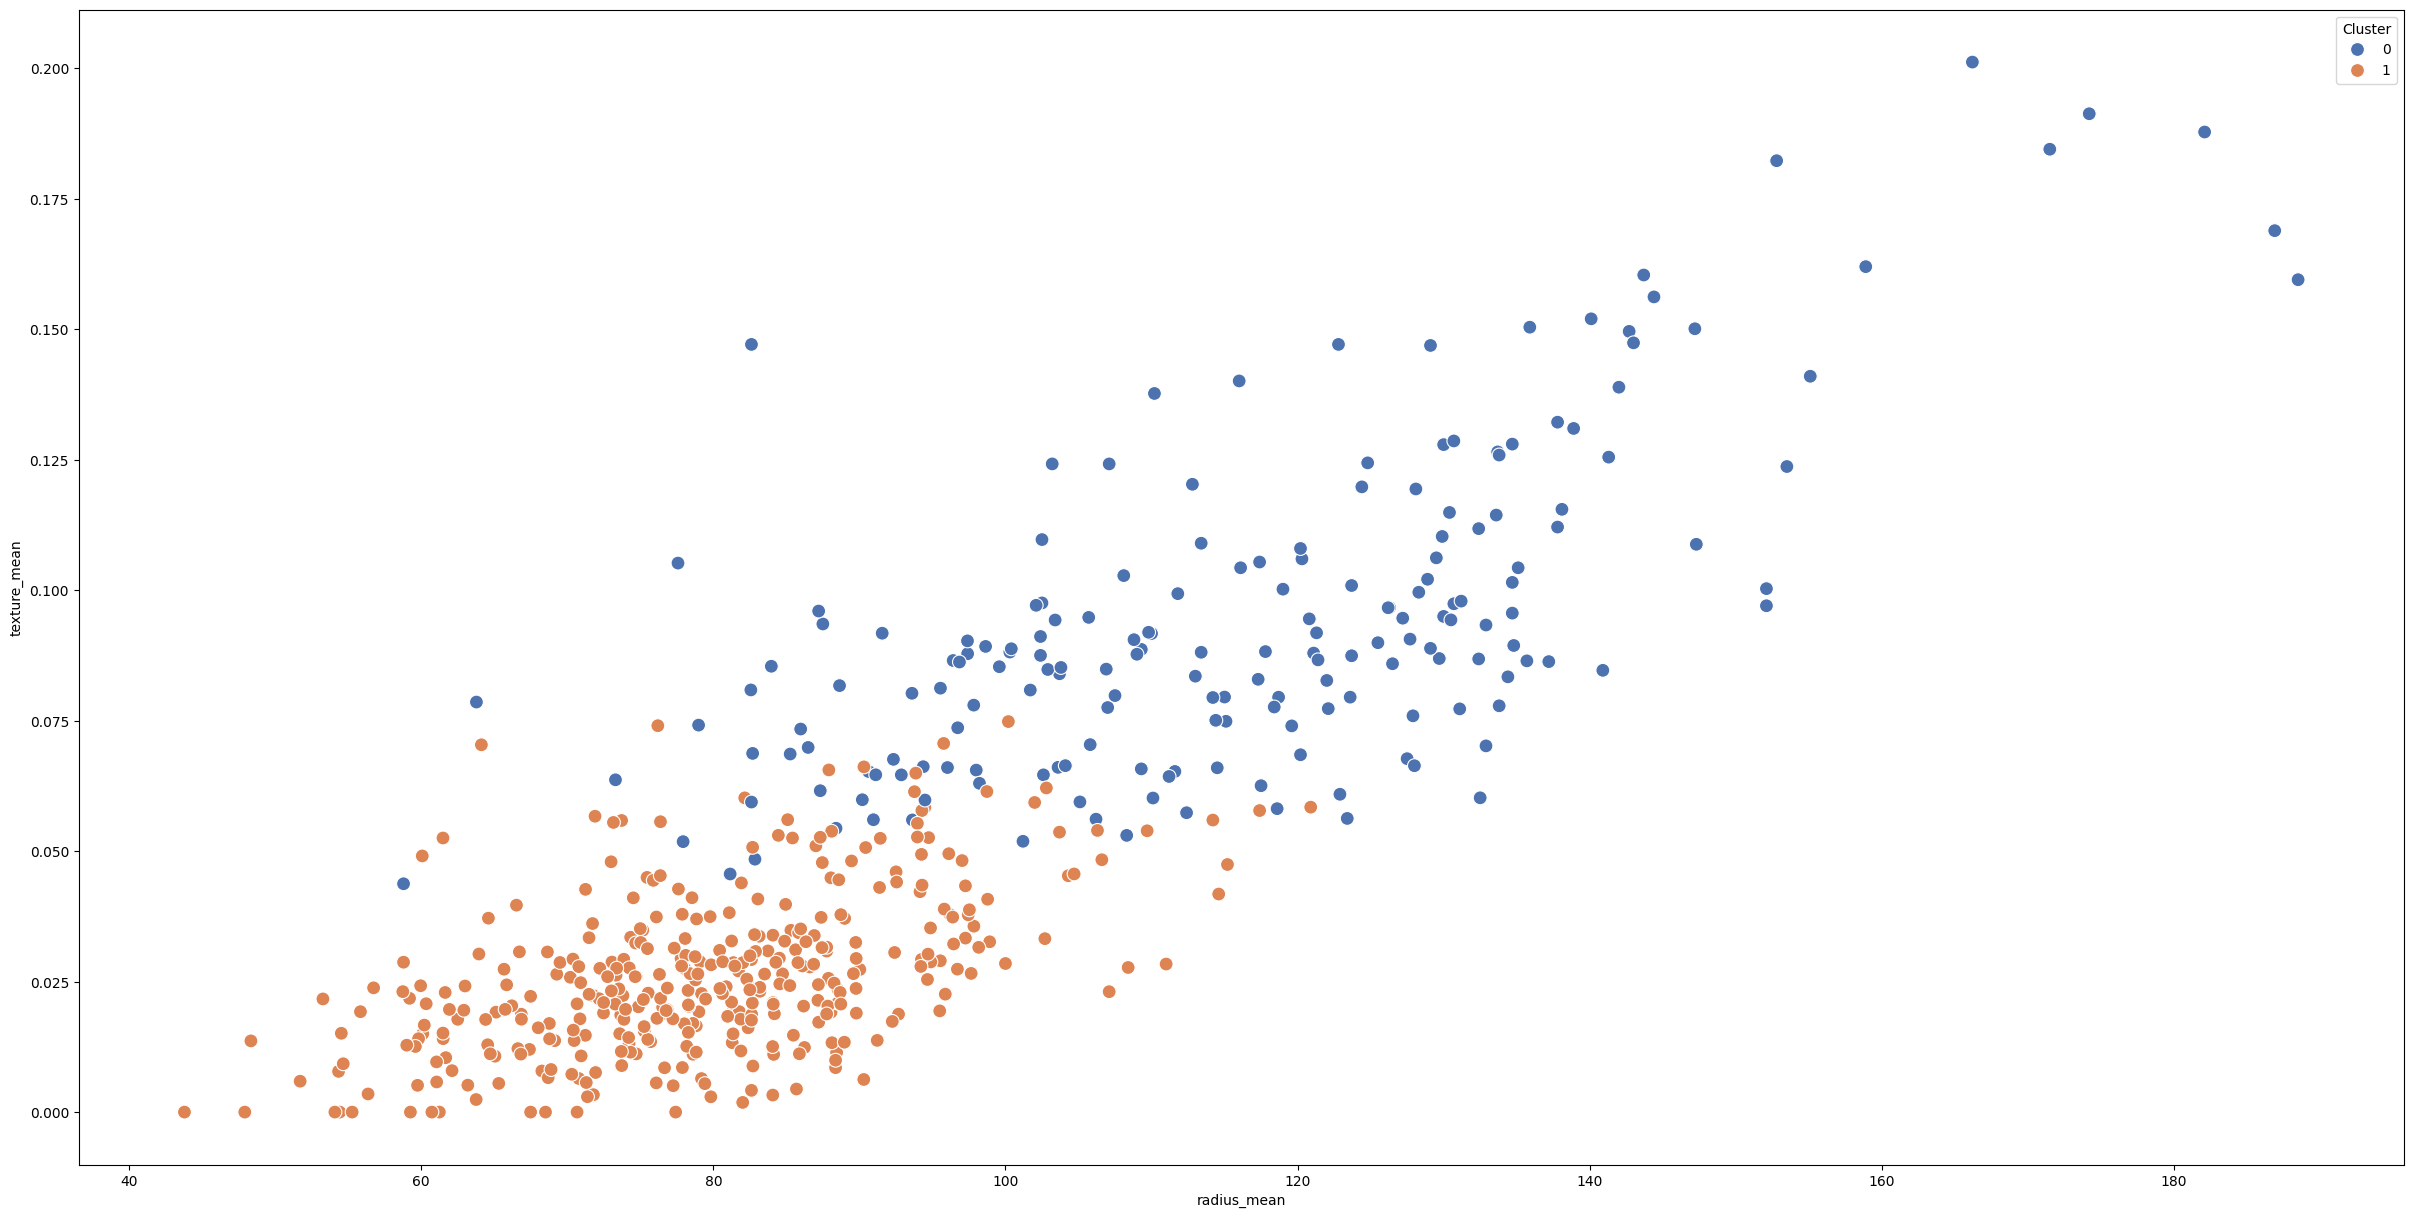

In [502]:
plt.figure(figsize=(30, 15))
sns.scatterplot(data=cancer_data_df, x=X.columns[2], y=X.columns[7], hue=cancer_data_df['Cluster'], palette='deep', s=100)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.show()

K-means plot between `radius_worst` and `radius_worst`

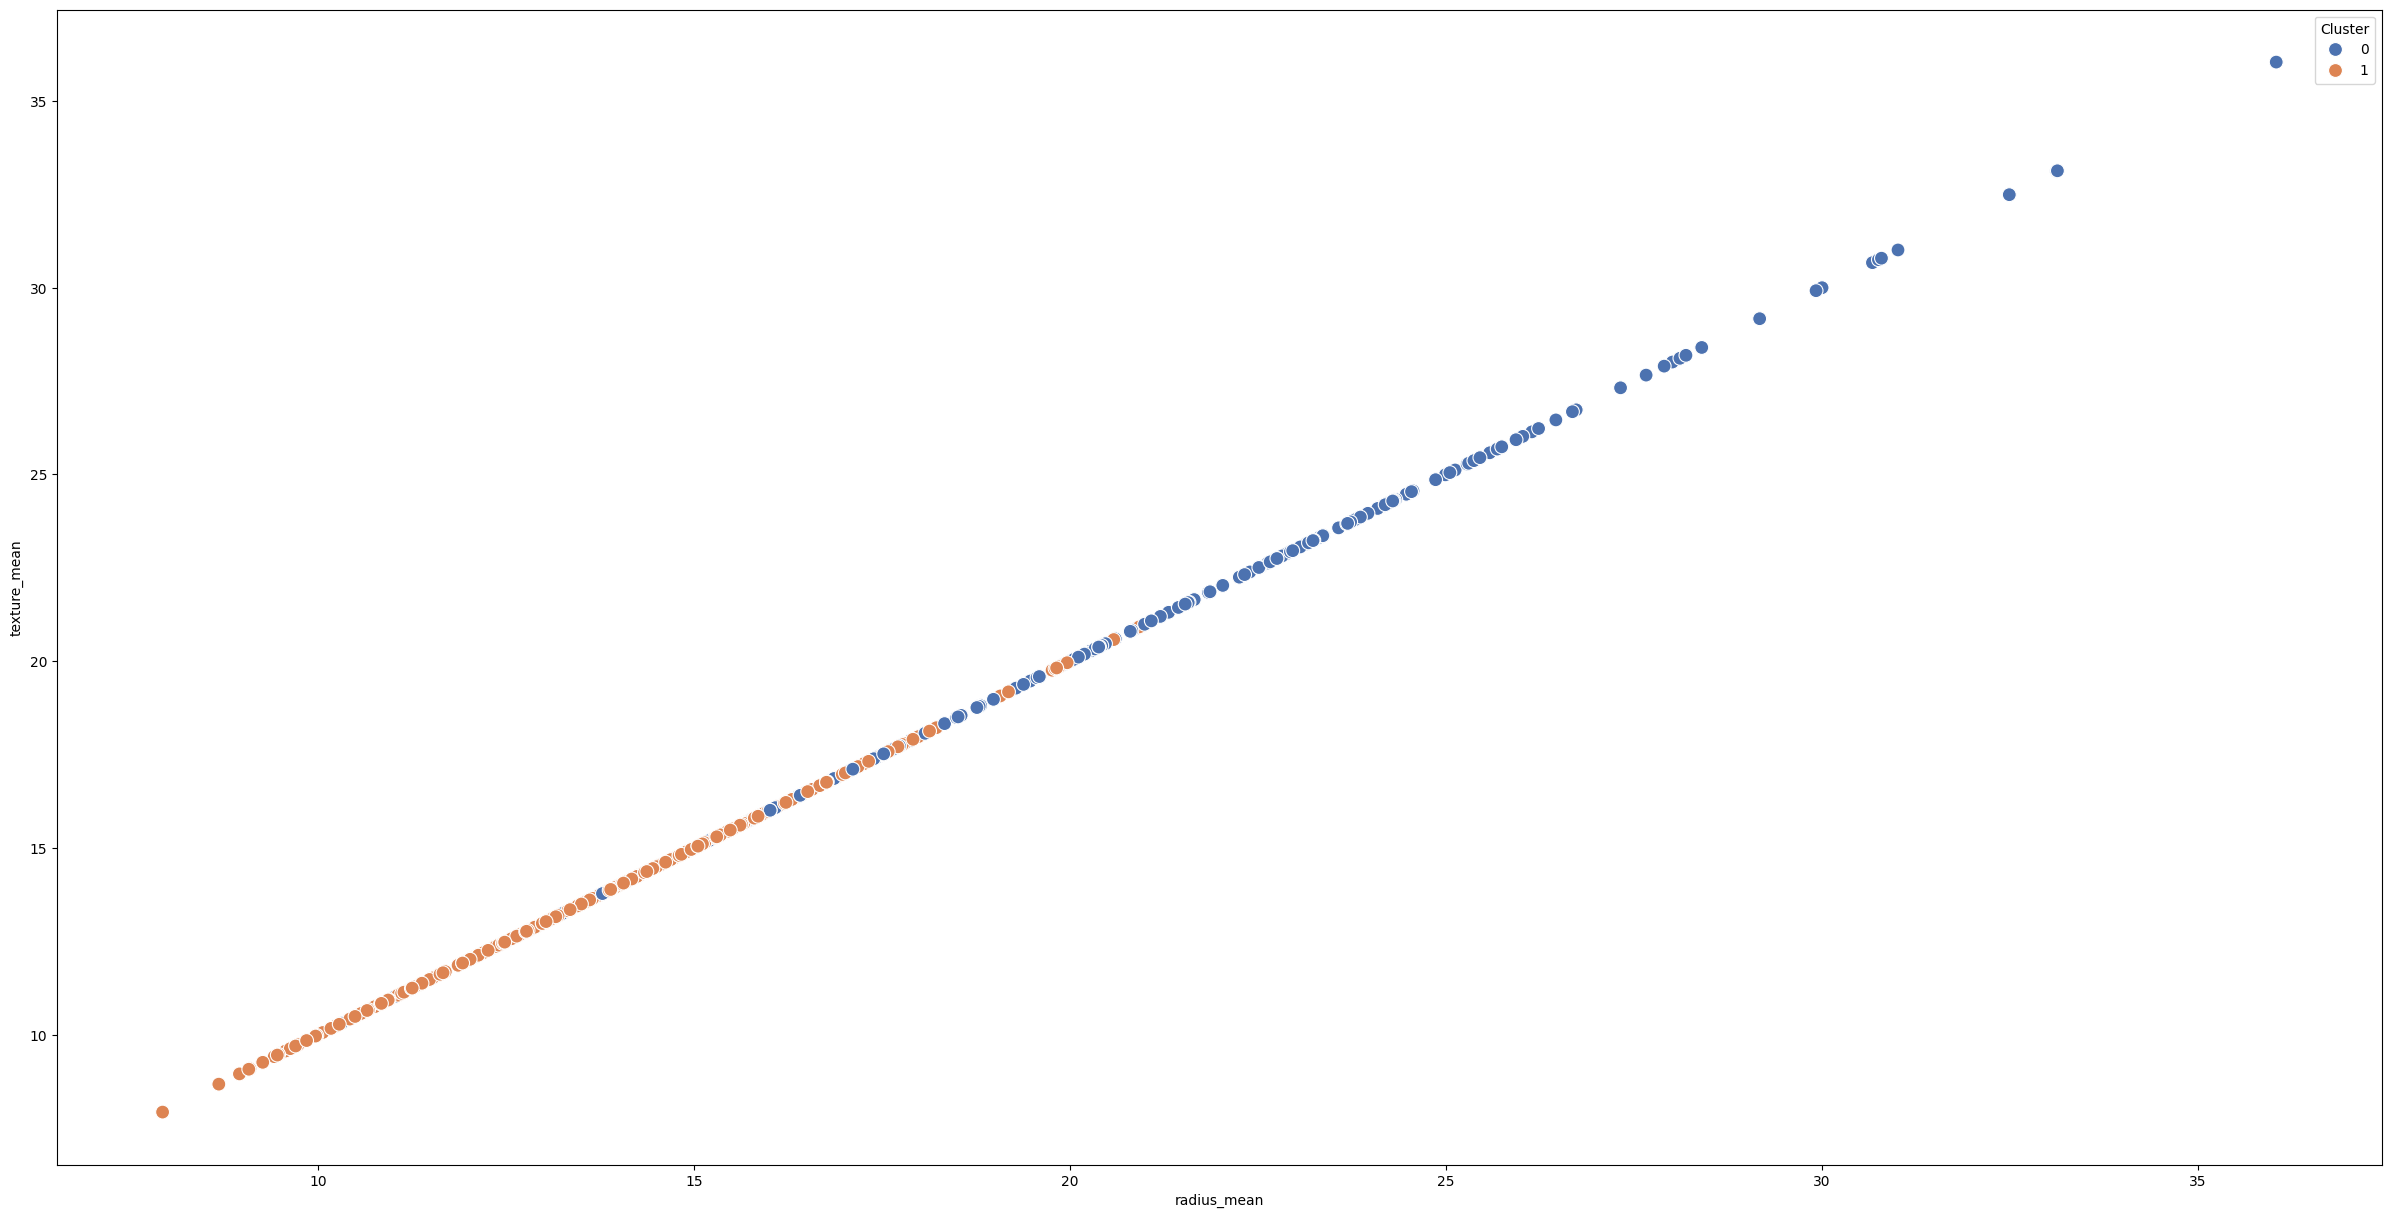

In [503]:
plt.figure(figsize=(30, 15))
sns.scatterplot(data=cancer_data_df, x=X.columns[20], y=X.columns[20], hue=cancer_data_df['Cluster'], palette='deep', s=100)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.show()

#### 3) Classification Models

<b>Random Forest Classifier</b>

In [504]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=60)

rf_model = rf_classifier.fit(X_train, y_train)
train_pred = rf_classifier.predict(X_train)
y_pred = rf_classifier.predict(X_test)

RF_train_accuracy = accuracy_score(y_train, train_pred)
RF_test_accuracy = accuracy_score(y_test, y_pred)
RF_loss = mean_squared_error(y_test, y_pred)

print(f"Random Forest Train Accuracy: {RF_train_accuracy * 100:.2f}%")
print(f"Random Forest Test Accuracy: {RF_test_accuracy * 100:.2f}%")
print(f"Random Forest Test Loss: {RF_loss* 100:.2f}%")
print("\n+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Random Forest Train Accuracy: 100.00%
Random Forest Test Accuracy: 98.25%
Random Forest Test Loss: 1.75%

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Classification Report:

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       107
         1.0       0.98      0.97      0.98        64

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



As we can see above, we recieved approximately <b>`98.25%`</b> accuracy using the <b>Random Forest Model</b>

In [505]:
conf_matrix = confusion_matrix(y_test, y_pred)

heatmap = go.Heatmap(z=conf_matrix, 
                     x=['Predicted 0', 'Predicted 1'],
                     y=['Actual 0', 'Actual 1'],
                     colorscale='reds', 
                     text=conf_matrix, texttemplate="%{text}")

layout = go.Layout(
    title='Confusion Matrix (Random Forest)',
    xaxis=dict(title='Predicted'),
    yaxis=dict(title='Actual'),
)

fig = go.Figure(data=[heatmap], layout=layout)
fig.show()

<b>AdaBoost Classifier</b>

In [506]:
base_estimator = DecisionTreeClassifier(max_depth=7)
ada_classifier = AdaBoostClassifier(n_estimators=200, random_state=90)

ada_model = ada_classifier.fit(X_train, y_train)

train_pred = ada_classifier.predict(X_train)
y_pred = ada_classifier.predict(X_test)

ada_train_accu = accuracy_score(y_train, train_pred)
ada_test_accu = accuracy_score(y_test, y_pred)
ada_loss = mean_squared_error(y_test, y_pred)

print(f"AdaBoost Train Accuracy Score: {ada_train_accu*100:.4f}%")
print(f"AdaBoost Test Accuracy Score: {ada_test_accu*100:.4f}%")
print(f"AdaBoost Test Loss: {ada_loss* 100:.2f}%")
print("\n+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n")
print("Classification Report")
print(classification_report(y_test, y_pred))

/Users/shivansh052k/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoost Train Accuracy Score: 100.0000%
AdaBoost Test Accuracy Score: 97.6608%
AdaBoost Test Loss: 2.34%

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Classification Report
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       107
         1.0       1.00      0.94      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



As we can see above, we recieved approximately <b>`97.6%`</b> accuracy using the <b>AdaBoost Classifier</b>

In [507]:
conf_matrix = confusion_matrix(y_test, y_pred)

heatmap = go.Heatmap(z=conf_matrix, 
                     x=['Predicted 0', 'Predicted 1'],
                     y=['Actual 0', 'Actual 1'],
                     colorscale='reds', 
                     text=conf_matrix, texttemplate="%{text}")

layout = go.Layout(
    title='Confusion Matrix (AdaBoost)',
    xaxis=dict(title='Predicted'),
    yaxis=dict(title='Actual'),
)

fig = go.Figure(data=[heatmap], layout=layout)
fig.show()

<b>Naive Bayes Classifier</b>

In [508]:
nb_classifier = GaussianNB()

nb_model = nb_classifier.fit(X_train, y_train)

train_pred = nb_classifier.predict(X_train)
y_pred = nb_classifier.predict(X_test)

nb_train_accu = accuracy_score(y_train, train_pred)
nb_test_accu = accuracy_score(y_test, y_pred)
nb_loss = mean_squared_error(y_test, y_pred)

print(f"Naive Bayes Train Accuracy Score: {nb_train_accu * 100:.4f}%")
print(f"Naive Bayes Test Accuracy Score: {nb_test_accu * 100:.4f}%")
print(f"Naive Bayes Test Loss: {nb_loss* 100:.4f}%")
print("\n+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n")
print("Classification Report")
print(classification_report(y_test, y_pred))

Naive Bayes Train Accuracy Score: 92.9648%
Naive Bayes Test Accuracy Score: 94.7368%
Naive Bayes Test Loss: 5.2632%

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Classification Report
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       107
         1.0       0.97      0.89      0.93        64

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



As we can see above, we recieved approximately <b>`94.7%`</b> accuracy using the <b>Naive Bayes Classifier</b>

In [509]:
conf_matrix = confusion_matrix(y_test, y_pred)

heatmap = go.Heatmap(z=conf_matrix, 
                     x=['Predicted 0', 'Predicted 1'], 
                     y=['Actual 0', 'Actual 1'], 
                     colorscale='reds', 
                     text=conf_matrix, texttemplate="%{text}")

layout = go.Layout(
    title='Confusion Matrix (AdaBoost)',
    xaxis=dict(title='Predicted'),
    yaxis=dict(title='Actual'),
)

fig = go.Figure(data=[heatmap], layout=layout)
fig.show()

#### 4) Comparing accuracies of the above three models

In [510]:
classification_models = ['Random Forest', 'AdaBoost','Naive Bayes']
class_accuracies = [RF_test_accuracy, ada_test_accu, nb_test_accu]
class_loss = [RF_loss, ada_loss, nb_loss]

fig = go.Figure()

fig.add_trace(go.Bar(
    x=classification_models, 
    y=class_accuracies,
    name='Accuracy',
    marker_color='royalblue',
    text=[f'{acc*100:.2f}%' for acc in class_accuracies],
    textposition='auto'
))

fig.add_trace(go.Bar(
    x=classification_models,
    y=class_loss,
    name='Loss',
    marker_color='firebrick',
    text=[f'{loss*100:.2f}' for loss in class_loss],
    textposition='auto'
))

fig.update_layout(
    title='Accuracy and Loss of Multiple Classification ML Models',
    xaxis_title='Model',
    yaxis_title='Value',
    yaxis_range=[0, max(max(class_accuracies), max(class_loss)) + 0.1],  # Adjust y-axis range accordingly
    template='plotly_white',
    barmode='group'  # Group bars for each model
)

### Part III: (Regression)

Separating the features and label other than `diagnosis`

In [511]:
X = cancer_data_scaled.drop(columns=['radius_mean'])
y = cancer_data_scaled['radius_mean']

Split the data into training and testing sets

In [512]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

print(f"Training set shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, Testing labels shape: {y_test.shape}")

Training set shape: (398, 30), Training labels shape: (398,)
Testing set shape: (171, 30), Testing labels shape: (171,)


#### 1) Regression Model

<b>Linear Regression</b>

In [513]:
Linear_Regression = LinearRegression()

Linear_Regression.fit(X_train, y_train)

train_pred = Linear_Regression.predict(X_train)
y_pred = Linear_Regression.predict(X_test)

LR_mse = mean_squared_error(y_test, y_pred)
LR_mae = mean_absolute_error(y_test, y_pred)

LR_train_r2 = r2_score(y_train, train_pred)
LR_test_r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", LR_mse)
print("Mean Absolute Error:", LR_mae)
print("\n+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n")
LR_train_accu = LR_train_r2 * 100
print(f"Linear Regression Train Accuracy: {LR_train_accu:.2f}%")

LR_test_accu = LR_test_r2 * 100
print(f"Linear Regression Test Accuracy: {LR_test_accu:.2f}%")

Mean Squared Error: 0.00010488249656490302
Mean Absolute Error: 0.005570851028249502

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Linear Regression Train Accuracy: 99.86%
Linear Regression Test Accuracy: 99.66%


<b>Ridge Regression</b>

In [514]:
ridge_regression = Ridge(alpha=0.1)  # You can adjust the alpha parameter
ridge_regression.fit(X_train, y_train)

train_pred = ridge_regression.predict(X_train)
y_pred = ridge_regression.predict(X_test)

RR_mse = mean_squared_error(y_test, y_pred)
RR_mae = mean_absolute_error(y_test, y_pred)

RR_train_r2 = r2_score(y_train, train_pred)
RR_test_r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", RR_mse)
print("Mean Absolute Error:", RR_mae)
print("\n+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n")
RR_train_accu = RR_train_r2 * 100
print(f"Linear Regression Train Accuracy: {RR_train_accu:.2f}%")

RR_test_accu = RR_test_r2 * 100
print(f"Linear Regression Test Accuracy: {RR_test_accu:.2f}%")

Mean Squared Error: 0.00019076376707582884
Mean Absolute Error: 0.008418930144071473

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Linear Regression Train Accuracy: 99.51%
Linear Regression Test Accuracy: 99.39%


<b>Gradient Boosting Regression</b>

In [515]:
gb_regression_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.2, max_depth=3, random_state=42)
gb_regression_model.fit(X_train, y_train)

train_pred = gb_regression_model.predict(X_train)
y_pred = gb_regression_model.predict(X_test)

GB_mse = mean_squared_error(y_test, y_pred)
GB_mae = mean_absolute_error(y_test, y_pred)

GB_train_r2 = r2_score(y_train, train_pred)
GB_test_r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", GB_mse)
print("Mean Absolute Error:", GB_mae)
print("\n+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n")
GB_train_accu = GB_train_r2 * 100
print(f"Linear Regression Train Accuracy: {GB_train_accu:.2f}%")

GB_test_accu = GB_test_r2 * 100
print(f"Linear Regression Test Accuracy: {GB_test_accu:.2f}%")

Mean Squared Error: 0.00012081092046813969
Mean Absolute Error: 0.006215114890204043

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Linear Regression Train Accuracy: 100.00%
Linear Regression Test Accuracy: 99.61%


#### 2) Mean Square loss for the above models

In [516]:
print("Mean Squared error for comparison are below:\n")
print("Mean Squared Error for Linear Regression:", LR_mse)
print("Mean Squared Error for Ridge Regression:", RR_mse)
print("Mean Squared Error for Gradient Boosting Regression:", GB_mse)

Mean Squared error for comparison are below:

Mean Squared Error for Linear Regression: 0.00010488249656490302
Mean Squared Error for Ridge Regression: 0.00019076376707582884
Mean Squared Error for Gradient Boosting Regression: 0.00012081092046813969


#### 3) Graph for the comparison

In [517]:
Regression_models = ['Linear Regression', 'Ridge Regression','Gradient Boosting Regression']
reg_accuracies = [LR_train_r2, RR_test_r2, GB_test_r2]
reg_loss = [LR_mse, RR_mse, GB_mse]

fig = go.Figure()

fig.add_trace(go.Bar(
    x=Regression_models, 
    y=reg_accuracies,
    name='Accuracy',
    marker_color='royalblue',
    text=[f'{acc*100:.2f}%' for acc in reg_accuracies],
    textposition='auto'
))

fig.update_layout(
    title='Accuracies for Multiple Regression ML Models',
    xaxis_title='Model',
    yaxis_title='R2 Score Value',
    yaxis_range=[0, 1],  # Adjust y-axis range accordingly
    template='plotly_white',
    barmode='group'  # Group bars for each model
)

In [518]:
Regression_models = ['Linear Regression', 'Ridge Regression','Gradient Boosting Regression']
reg_accuracies = [LR_train_r2, RR_test_r2, GB_test_r2]
reg_loss = [LR_mse, RR_mse, GB_mse]

fig = go.Figure()

fig.add_trace(go.Bar(
    x=Regression_models,
    y=reg_loss,
    name='Loss (MSE)',
    marker_color='firebrick',
    text=[f'{loss}' for loss in reg_loss],
    textposition='auto'
))

fig.update_layout(
    title='Losses for Multiple Regression ML Models',
    xaxis_title='Model',
    yaxis_title='MSE Value',
    yaxis_range=[0, 0.0004],  # Adjust y-axis range accordingly
    template='plotly_white',
    barmode='group'  # Group bars for each model
)